In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
samples_1 = np.array([47,50,76,53,91,15,85,105])
print(samples_1)

[ 47  50  76  53  91  15  85 105]


In [3]:
samples_2 = np.array([47,50,76,53,91,15,85,105,22,16,54,91,90,57,52,23,48,69,90,44])
print(samples_2)

[ 47  50  76  53  91  15  85 105  22  16  54  91  90  57  52  23  48  69
  90  44]


### Average

In [4]:
np.mean(samples_1)

65.25

### Standard Deviation (if we had a normal distribution)

In [5]:
np.std(samples_1)

27.36215452043205

# Weibull

![weibull](weibull_modulus.png)

Tune-able varibles:

sigma_0 --> scaling parameter --> characteristic strength

m --> Weibull Modulus

(helps fit a lot of datasets)


high m --> narrow distribution


**typically need 20 samples**

In [6]:
samples_2_sorted = np.sort(samples_2)
print(samples_2_sorted)

[ 15  16  22  23  44  47  48  50  52  53  54  57  69  76  85  90  90  91
  91 105]


In [7]:
samples_2_rank = np.arange(1,len(samples_2_sorted)+1)
print(samples_2_rank)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [8]:
#failure rate (i.e. if you were to stretch the rubber band to 15 mm, what is the chance of failure?)
F = (samples_2_rank-0.5)/len(samples_2_rank)
print(F)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


![weibull_linear](weibull_linear.png)

How to do ln in numpy? https://stackoverflow.com/questions/10593100/how-do-you-do-natural-logs-e-g-ln-with-numpy-in-python

In [9]:
y = np.log(np.log(1/(1-F)))
print(y)

[-3.67624726 -2.55153963 -2.01341868 -1.64832484 -1.36691437 -1.13449766
 -0.93383731 -0.75501486 -0.59170089 -0.43950233 -0.29512238 -0.15587504
 -0.01935689  0.11683156  0.25540486  0.39988616  0.55559016  0.73209937
  0.95176102  1.30532274]


equation says sigma_f, failure stress, but it can be anything related to the problem, which in this case is length at failure

In [10]:
x = np.log(samples_2_sorted)
print(x)

[2.7080502  2.77258872 3.09104245 3.13549422 3.78418963 3.8501476
 3.87120101 3.91202301 3.95124372 3.97029191 3.98898405 4.04305127
 4.2341065  4.33073334 4.44265126 4.49980967 4.49980967 4.51085951
 4.51085951 4.65396035]


<AxesSubplot:xlabel='ln_sigma_f', ylabel='ln_ln_1_1-f'>

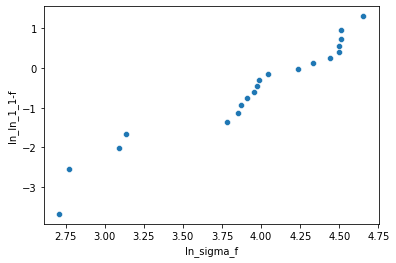

In [11]:
fig, ax = plt.subplots()
ax.set(xlabel="ln_sigma_f",ylabel="ln_ln_1_1-f")
sns.scatterplot(x=x,y=y,ax=ax)

In [12]:
linear_model = LinearRegression()

In [13]:
linear_model.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

In [14]:
y_pred = linear_model.predict(x.reshape(-1,1))

In [15]:
r2_score(y,y_pred)

0.9375588791962423

<AxesSubplot:xlabel='ln_sigma_f', ylabel='ln_ln_1_1-f'>

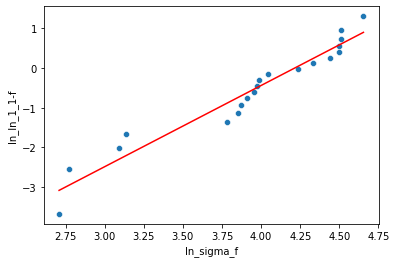

In [16]:
fig, ax = plt.subplots()
ax.set(xlabel="ln_sigma_f",ylabel="ln_ln_1_1-f")
sns.scatterplot(x=x,y=y,ax=ax)
sns.lineplot(x=x,y=y_pred.flatten(),ax=ax,color="red")

#### Weibull modulus m:

In [17]:
#Weibull modulus for this material is m
m = linear_model.coef_[0][0]
print(m)

2.0465650628661436


intercept b:

In [18]:
b =  linear_model.predict([[0]])[0][0]
print(b)

-8.62270834657528


If you required failure rate is 1 in a million, then F = 1 / 1e6

In [19]:
F_req = 1/1e6
print(F_req)

1e-06


In [20]:
y_req = np.log(np.log(1/(1-F_req)))
print(y_req)

-13.815510057958432


In [21]:
m

2.0465650628661436

In [22]:
b

-8.62270834657528

In [23]:
ln_sigma_f = (y_req - b)/m ##remember sigma_f here is actual the ln of length, not ln of failure stress
print(ln_sigma_f)

-2.5373254950960678


In [24]:
np.exp(ln_sigma_f)

0.07907761068005142

In [25]:
def derive_weibull_params(samples):
    samples_sorted = np.sort(samples)
    samples_rank = np.arange(1,len(samples_sorted)+1)
    F = (samples_rank-0.5)/len(samples_rank)
    y = np.log(np.log(1/(1-F)))
    x = np.log(samples_sorted)
    linear_model = LinearRegression()
    linear_model.fit(x.reshape(-1,1),y.reshape(-1,1))
    y_pred = linear_model.predict(x.reshape(-1,1))
    r2 = r2_score(y,y_pred)
    m = linear_model.coef_[0][0]
    b = linear_model.predict([[0]])[0][0]
    
    fig, ax = plt.subplots()
    ax.set(xlabel="ln_sigma_f",ylabel="ln_ln_1_1-f")
    sns.scatterplot(x=x,y=y,ax=ax)
    sns.lineplot(x=x,y=y_pred.flatten(),ax=ax,color="red")
    
    print(f"Weibull modulus = {m}")
    print(f"Intercept = {b}")
    print(f"R^2 = {r2}")
    
    return({"m":m,"b":b,"r2":r2})

In [26]:
samples_test = samples_2

Weibull modulus = 2.0465650628661436
Intercept = -8.62270834657528
R^2 = 0.9375588791962423


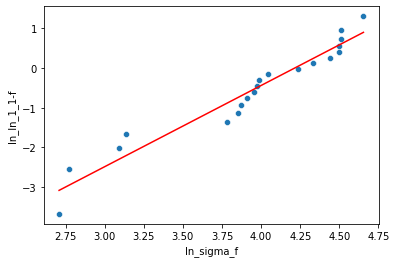

In [27]:
weibull_params_sample_test = derive_weibull_params(samples_test)